In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
%matplotlib inline

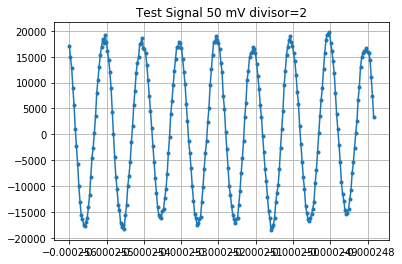

In [2]:
divisor = 2
vsamp = 62.5e6/divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

#Test signals at 1421MHz
#Horn is at 1420MHz

test50mv = np.loadtxt('arr50mv.txt')[0:N]
test50mvdv1 = np.loadtxt('arr50mvdv1.txt')[0:N]
test100mv = np.loadtxt('arr100mv.txt')[0:N]
test100mvdv1 = np.loadtxt('arr100mvdv1.txt')[0:N]
test200mv = np.loadtxt('arr200mv.txt')[0:N]
test200mvdv1 = np.loadtxt('arr200mvdv1.txt')[0:N]

plt.plot(t[0:2**8], test50mv[0:2**8], '.-')
plt.title('Test Signal 50 mV divisor=2')
plt.grid(True)
plt.show()


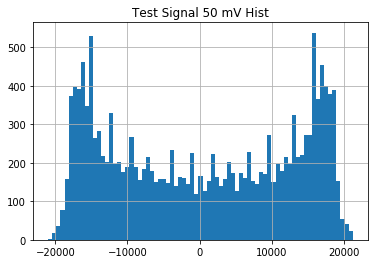

In [3]:
#Bimodal distribution??
plt.hist(test50mv, bins=75)
plt.title('Test Signal 50 mV Hist')
plt.grid(True)
plt.show()

C:\Users\Eden\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


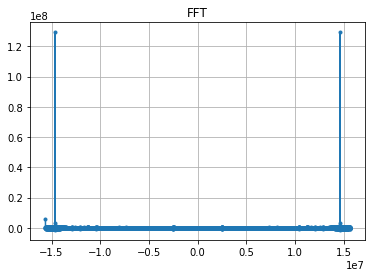

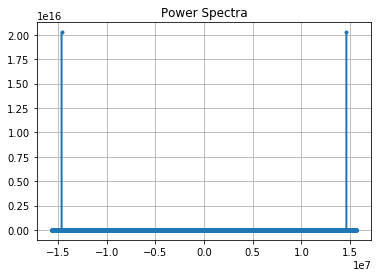

In [4]:
#Power Spectra/FFT
fft = sci.fft(test50mv)
power = np.abs(fft)**2

plt.plot(f,fft, '.-')
plt.title('FFT')
plt.grid(True)
plt.show()

plt.plot(f,power,'.-')
plt.title('Power Spectra')
plt.grid(True)
plt.show()

In [5]:
block1421_1a = np.genfromtxt("1421_5blocks.txt")[0:N]
block1421_1b = np.genfromtxt("1421_5blocks.txt")[N:N*2]
block1421_2a = np.genfromtxt("1421_5blocks.txt")[N*2:N*3]
block1421_2b = np.genfromtxt("1421_5blocks.txt")[N*3:N*4]
block1421_3a = np.genfromtxt("1421_5blocks.txt")[N*4:N*5]
block1421_3b = np.genfromtxt("1421_5blocks.txt")[N*5:N*6]
block1421_4a = np.genfromtxt("1421_5blocks.txt")[N*6:N*7]
block1421_4b = np.genfromtxt("1421_5blocks.txt")[N*7:N*8]
block1421_5a = np.genfromtxt("1421_5blocks.txt")[N*8:N*9]
block1421_5b = np.genfromtxt("1421_5blocks.txt")[N*9:N*10]


[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


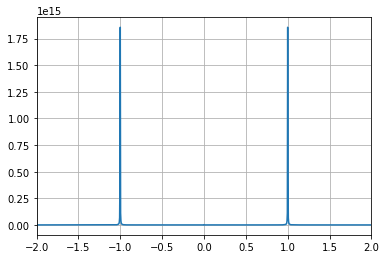

(2, 16000)


In [6]:
divisor = 1
N = 16000
vsamp = 62.5/divisor
f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)


c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()
print(c.shape)

[  1.34748570e+10   3.81400933e+08   6.19201087e+07 ...,   1.78322522e+08
   6.19201087e+07   3.81400933e+08]


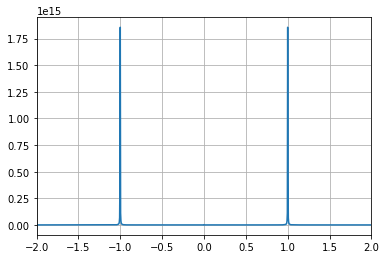

In [7]:
c = np.array([block1421_1a] + [1j*block1421_1b])
power = np.abs(sci.fft(c))**2
meanpower = np.mean(np.fft.fftshift(power), axis=0)
print(meanpower)
plt.plot(f, meanpower)
plt.xlim(-2,2)
plt.grid(True)
plt.show()

In [62]:
arr1419A = np.genfromtxt("1419_test_0.txt")[0:1584000]
arr1419B = np.genfromtxt("1419_test_0.txt")[1584000:3168000]
arr1419 = np.genfromtxt("1419_test_0.txt")

In [75]:
divisor = 1
vsamp = 62.5e6/divisor
N = 16000

f = np.linspace(-(vsamp/2), (vsamp/2)*(1-(2/N)), N)
t = np.linspace(-N/(2*vsamp),((N/2)-1)/vsamp,N)

arrA99 = np.array([])
arrB99 = np.array([])

powerlist = np.empty((2,16000))
for i in np.arange(99):
    arr1419Aa = arr1419A[N*i:N*(i+1)]
    arr1419Bb = arr1419B[N*i:N*(i+1)]
    c = np.array([arr1419Aa] + [1j*arr1419Bb])
    power = np.abs(sci.fft(c))**2
    powerlist = np.append(powerlist, power, axis=0)
    

(200, 16000)
[  9.61983856e+11   4.42276859e+11   4.71488824e+11 ...,   6.93649438e+11
   4.71489136e+11   4.42277015e+11]


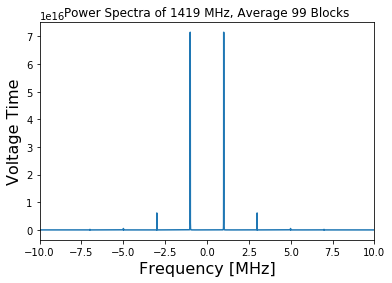

In [122]:

print(powerlist.shape)
meanpower = np.mean(powerlist, axis=0)
print(meanpower)
plt.xlim(-10,10)
plt.plot(f/1e6, np.fft.fftshift(meanpower))
plt.title('Power Spectra of 1419 MHz, Average 99 Blocks',fontsize=12)
plt.xlabel('Frequency [MHz]',fontsize=16)
plt.ylabel('Voltage Time',fontsize=16)
plt.show()